## Fisher's Iris flowers Data set

### This is a notebook of processing Fisher's Iris data set
    Created in 1936 by R. A. Fisher, this data set contains data of 150 entries about 3 different types of Iris flower with 50 instances of each type of plant.
##### Attribute list:
    1. Sepal length in cm;
    2. Sepal width in cm;
    3. Petal length in cm;
    4. Petal width in cm;
    5. Class of Iris plant(Iris-Setosa, Iris-Versicolour, Iris-Virginica)
    
Information found on: https://archive.ics.uci.edu/ml/datasets/iris

Original paper: *"Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

In [6]:
# Problem 1 --> Load and print out the data from CSV file as numpy array

import numpy as np
import csv
import matplotlib.pyplot as pl

# adapted from https://stackoverflow.com/questions/24662571/python-import-csv-to-list
def read_iris_data(fPath):
    with open(fPath, 'r') as f:
        irisData = list(csv.reader(f, delimiter=','))
        irisData = np.array(irisData)
    print(irisData)
    return irisData    
dataArray = read_iris_data('data/iris.csv')



[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.9' '1.7' '0.4' 'Iris-setosa']
 ['4.6' '3.4' '1.4' '0.3' 'Iris-setosa']
 ['5.0' '3.4' '1.5' '0.2' 'Iris-setosa']
 ['4.4' '2.9' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.1' '1.5' '0.1' 'Iris-setosa']
 ['5.4' '3.7' '1.5' '0.2' 'Iris-setosa']
 ['4.8' '3.4' '1.6' '0.2' 'Iris-setosa']
 ['4.8' '3.0' '1.4' '0.1' 'Iris-setosa']
 ['4.3' '3.0' '1.1' '0.1' 'Iris-setosa']
 ['5.8' '4.0' '1.2' '0.2' 'Iris-setosa']
 ['5.7' '4.4' '1.5' '0.4' 'Iris-setosa']
 ['5.4' '3.9' '1.3' '0.4' 'Iris-setosa']
 ['5.1' '3.5' '1.4' '0.3' 'Iris-setosa']
 ['5.7' '3.8' '1.7' '0.3' 'Iris-setosa']
 ['5.1' '3.8' '1.5' '0.3' 'Iris-setosa']
 ['5.4' '3.4' '1.7' '0.2' 'Iris-setosa']
 ['5.1' '3.7' '1.5' '0.4' 'Iris-setosa']
 ['4.6' '3.6' '1.0' '0.2' 'Iris-setosa']
 ['5.1' '3.3' '1.7' '0.5' 'Iris-setosa']
 ['4.8' '3.4' '1

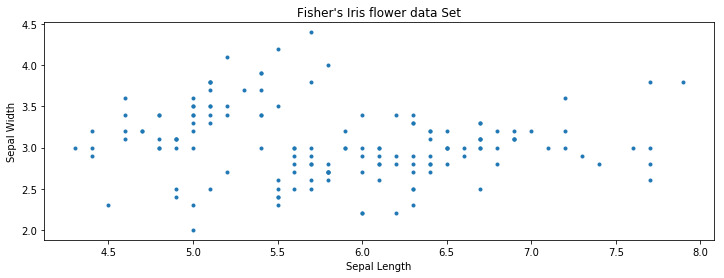

In [7]:
# Problem 3 --> Simple plot graph to display data

# Variable naming convention explained
# sepal length - sl
# sepal width - sw

sl = dataArray[:, 0]
sw = dataArray[:, 1]

pl.plot(sl, sw, '.')
pl.title('Fisher\'s Iris flower data Set')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.show()
    

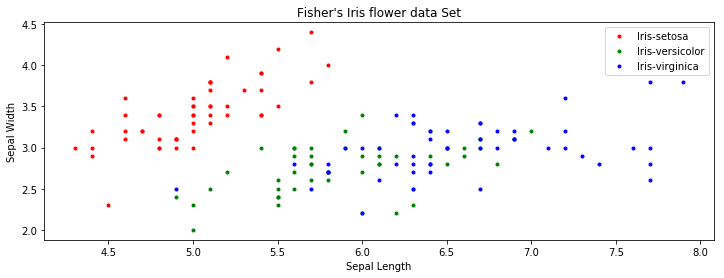

In [8]:
#Problem 4 --> More complex Graph with different colours and legend.

sl1, sl2, sl3 = np.split(sl, 3)
sw1, sw2, sw3 = np.split(sw, 3)

colours=[]
tp = dataArray[:, -1]

for i in range(len(sl)):
    if i > 100:
        colours.append('blue')
    elif i > 50:
        colours.append('green')
    else:
        colours.append('red')

pl.rcParams['figure.figsize'] = (12,4)  #makes plot figure bigger
pl.plot(sl1, sw1, 'r.', sl2, sw2, 'g.', sl3, sw3, 'b.')
pl.title('Fisher\'s Iris flower data Set')
pl.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.show()


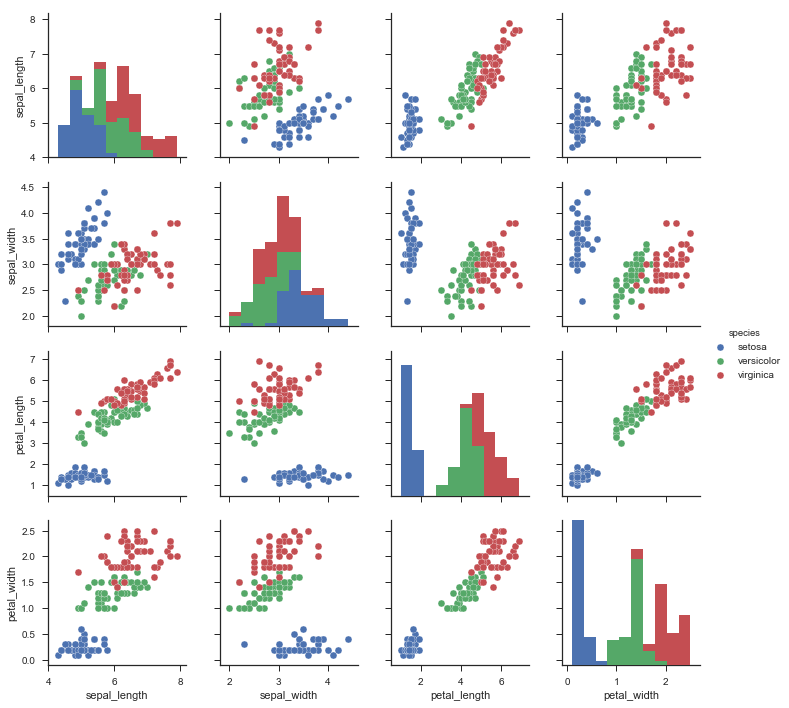

In [9]:
#Problem 5 --> Seaborn library data display
# removes the need to add pl.show() after sb.pairplot() function
%matplotlib inline  
import seaborn as sb
sb.set(style = "ticks")

gr = sb.load_dataset("iris")
sb.pairplot(gr, hue ="species")


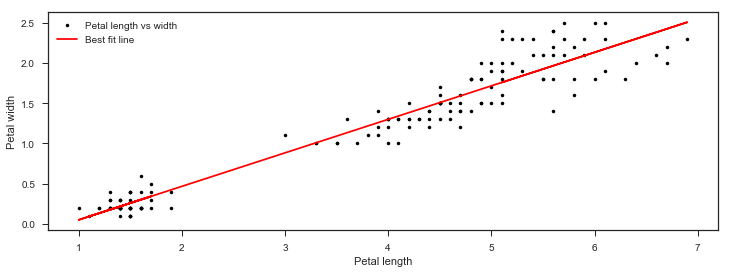

In [73]:
# Problem 6 --> Add straight line to petal length and petal width graph from entire dataset

plen = dataArray[:, 2]
pwid = dataArray[:, 3]

#get numpy array values of the length and width arrays.
#For some reason I couldnt just use them as they are in subsequent calculations
plar = np.asarray(plen, dtype=float)
pwar = np.asarray(pwid, dtype=float)

x, y = np.polyfit(plar, pwar, 1)

#calculate best fit line for this graph
pwid_est = plar * x + y

pl.rcParams['figure.figsize'] = (12,4)  #makes plot figure bigger
pl.plot(plen, pwid, 'k.', label='Petal length vs width')  # plot length vs width graph
pl.plot(plen, pwid_est, 'r-', label='Best fit line')  # Plot the best fit line
pl.legend()
pl.xlabel('Petal length')
pl.ylabel('Petal width')
pl.show()

In [75]:
# Problem 7 --> Calculate R squared value

#calculate average width of petals in dataset
y_avg = np.mean(pwar)

#calculate R squared value using formula from linear regression labs
r_sqrd = 1 - np.sum((pwar-pwid_est)**2)/np.sum((pwar-y_avg)**2)

print(r_sqrd)  # Print out derived square root




0.926901227922


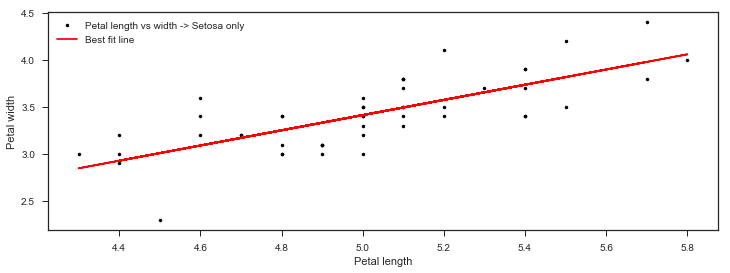

In [78]:
#Problem 8 --> Fit another line where species is setosa.

#Most of this problem is just reusing my code from problem 6 solution.
#get numpy array values of the length and width arrays.
#For some reason I couldnt just use them as they are in subsequent calculations
plar = np.asarray(sl1, dtype=float)
pwar = np.asarray(sw1, dtype=float)

x, y = np.polyfit(plar, pwar, 1)

#calculate best fit line for this graph
pwid_est = plar * x + y

pl.rcParams['figure.figsize'] = (12,4)  #makes plot figure bigger
pl.plot(sl1, sw1, 'k.', label='Petal length vs width -> Setosa only')  # plot length vs width graph
pl.plot(sl1, pwid_est, 'r-', label='Best fit line')  # Plot the best fit line
pl.legend()
pl.xlabel('Petal length')
pl.ylabel('Petal width')
pl.show()


In [79]:
#Probem 9 --> Calculate R squared value for the Setosa-only graph in problem 8 solution
#calculate average width of petals in dataset
y_avg = np.mean(pwar)

#calculate R squared value using formula from linear regression labs
r_sqrd = 1 - np.sum((pwar-pwid_est)**2)/np.sum((pwar-y_avg)**2)

print(r_sqrd)  # Print out derived square root

0.557680925892
